# Hyperparameter Tuning with GridSearchCV
This tutorial demonstrates how to use Grid Search and Cross-Validation to tune hyperparameters for SVM and KNN models using the Breast Cancer Wisconsin dataset.

## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Step 2: Load and Explore the Dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Step 3: Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Step 4: Define Pipeline for SVM

In [4]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

svm_params = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 0.01, 0.1]
}

grid_svm = GridSearchCV(svm_pipeline, svm_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Best parameters (SVM):", grid_svm.best_params_)
print("Best cross-validation score (SVM):", grid_svm.best_score_)

Best parameters (SVM): {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation score (SVM): 0.9774050632911392


## Step 5: Evaluate SVM Model

Accuracy (SVM): 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



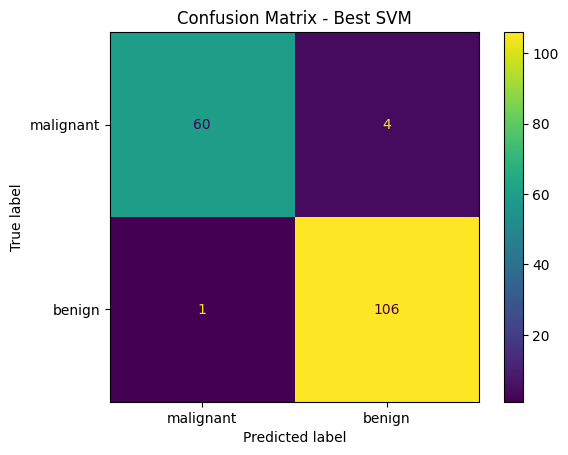

In [5]:
y_pred_svm = grid_svm.predict(X_test)
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(grid_svm, X_test, y_test, display_labels=data.target_names)
plt.title("Confusion Matrix - Best SVM")
plt.show()

## Step 6: Define Pipeline for KNN

In [6]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_pipeline, knn_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("Best parameters (KNN):", grid_knn.best_params_)
print("Best cross-validation score (KNN):", grid_knn.best_score_)

Best parameters (KNN): {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Best cross-validation score (KNN): 0.9724367088607595


## Step 7: Evaluate KNN Model

Accuracy (KNN): 0.9590643274853801
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



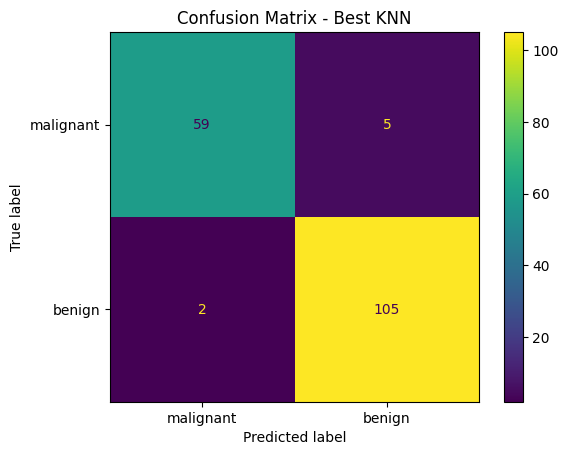

In [7]:
y_pred_knn = grid_knn.predict(X_test)
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay.from_estimator(grid_knn, X_test, y_test, display_labels=data.target_names)
plt.title("Confusion Matrix - Best KNN")
plt.show()

## Step 8: Visual Comparison of Best Parameters and Scores

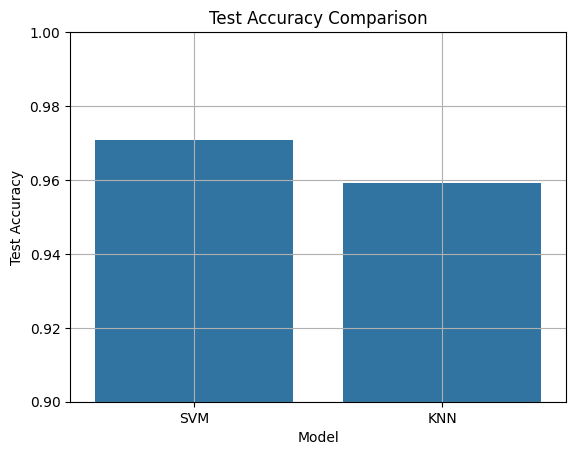

In [8]:
results = {
    "Model": ["SVM", "KNN"],
    "Test Accuracy": [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn)],
    "Best CV Score": [grid_svm.best_score_, grid_knn.best_score_]
}

results_df = pd.DataFrame(results)
sns.barplot(data=results_df, x='Model', y='Test Accuracy')
plt.title("Test Accuracy Comparison")
plt.ylim(0.9, 1)
plt.grid(True)
plt.show()